# Volumes, Regimes and Liquidity

This and many of our modules are going to contain data analysis sections. These sections are going to make intense use various statistical and data analysis packages in Python. While this course will present a lot of code in these sections, the aim of these modules will not be to teach one to code or to use these particular tools as this will largely form part of one's assumed knowledge.

This section, in particular, will make use of base packages, such are OS and requests, incorporating data analysis and plotting using Pandas, NumPy, HoloViews and Hvplot. While many of you should be familiar with Pandas and NumPy from previous exposures to Python, there exist many resources online to help develop these skills. One package we will be making use of, which may be less familiar to many of you who have made plots in Python before in the past, is HoloViews and Hvplot. For more resources on these packages, we would recommend using [Pyviz Tutorials](http://pyviz.org/tutorial/index.html).  For those who are a bit rusty, I would recommend keeping a [cheat sheet](https://www.datacamp.com/community/data-science-cheatsheets) handy.  
  

The main reason for displaying the code integrated into these sections is so that students can reproduce this code and explore it with other parameters or use it on other datasets. It also helps guide students on some of the math and help individuals when implementing their own code in assignments and future research.

For the most part, this course will be making use of publicly available datasets. In some cases, we will be downloading them programmatically ourselves in the code or integrating numerous data sources in order to produce our analysis. As much of this course looks at incredibly historic data, this data can often be hard and difficult to come by and can require a large amount of cleaning. These are crucial skills for analysts in being able to source, clean, integrate and develop data into hypothesis and findings.

Some of these notes may include small black cells with comments like this:

In [9]:
### Fill in some code here to print to console "Financial Engineering"



This will provide students with the opportunity to follow the code better and extract their own findings. This will require students downloading these files and running them in the correct environment on their own machines, but should provide valuable additional insight into both the code being run and the data being analysed, as shown below:

In [10]:
### Fill in some code here to print to console "Financial Engineering"
print("Financial Engineering")

Financial Engineering


We will start by importing a number of packages. If your environment is setup correctly from the setup notes, it should execute correctly and without any issues.  

In [11]:
# Import Libraries
import os
import requests

import pandas as pd
import numpy as np

import holoviews as hv
import hvplot.pandas

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
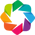

In [12]:
# Import Plotting Backend
hv.extension('bokeh')

The data used for these notes is included in the Data Folder if students would like to run this code themselves and analyse the output.  Code has been included to scrape the data directly from the NYSE website themselves; however, this should not be necessary.  On long-term historical data, it is often challending to find consistent price data; however, volumes are readily recorded.  In order to gain insight into the effects of the crash and history of these markets, we will observe this datapoint overtime in order to gain some peak into evolving market regimes.  

In [13]:
date_ranges = [[1970, 1979, 'dat'],
               [1960, 1969, 'dat'],
               [1950, 1959, 'dat'],
               [1940, 1949, 'dat'],
               [1930, 1939, 'dat'],
               [1920, 1929, 'prn'],
               [1900, 1919, 'dat'],
               [1888, 1899, 'dat']][::-1]

In [14]:
# # Download Data

# def get_decade(start = 1920, end = 1929, extension='prn'):
#     "Specify the sparting year of the decade eg. 1900, 2010, 2009"
#     try:
#         link = requests.get(f'https://www.nyse.com/publicdocs/nyse/data/Daily_Share_Volume_{start}-{end}.{extension}')
#         file = os.path.join("..","Data",f"Daily_Share_Volume_{start}-{end}.{extension}")
        
#         if link.status_code == 404:
#             raise
#         else:
#             with open(file, 'w') as temp_file:
#                 temp_file.write(str(link.content.decode("utf-8")))

#             print(f"Successfully downloaded {start}-{end}")

#     except:
#         print("There was an issue with the download. \n\
# You may need a different date range or file extension. \n\
# Check out https://www.nyse.com/data/transactions-statistics-data-library")

# download_history = [get_decade(decade[0], decade[1], decade[2]) for decade in date_ranges]

In order to start exploring this data, we are going to import it into a Pandas Dataframe.  Using this Dataframe we can then import it into HoloWiews in order to track specific data points over time and interact with them as needed.  

In [19]:
# Read and format the data
def load_data(start = 1920, end = 1929, extension='prn'):
    path = os.path.join("Data",f"Daily_Share_Volume_{start}-{end}.{extension}")
    
    if extension=='prn':
        data = pd.read_csv(path , sep='   ', parse_dates=['Date'], engine='python').iloc[2:,0:2]
        data.loc[:,"  Stock U.S Gov't"] = pd.to_numeric(data.loc[:,"  Stock U.S Gov't"], errors='coerce')
        data.Date = pd.to_datetime(data.Date, format='%Y%m%d', errors='coerce')
        data.columns = ['Date','Volume']
        return data
    else:
        data = pd.read_csv(path)
        data.iloc[:,0] = data.iloc[:,0].apply(lambda x: str(x).strip(' '))
        data = data.iloc[:,0].str.split(' ', 1, expand=True)
        data.columns = ['Date','Volume']
        data.loc[:,"Volume"] = pd.to_numeric(data.loc[:,"Volume"], errors='coerce')
        data.Date = pd.to_datetime(data.Date, format='%Y%m%d', errors='coerce')
        return data

In [20]:
data = pd.concat([load_data(decade[0], decade[1], decade[2]) for decade in date_ranges], axis=0)

Markets are complex and dynamic systems made up of many agents who not only respond to external information, but to the market itself. These agents learn over time and develop complex behaviour through there interactions. As these markets evolve, characteristics can change requiring new strategies in order to keep up with market trends. Markets are dynamic and can me made up of a number of states. Markets can often respond and behave dramatically different during times of crisis, that they do in either Bull or Bear Markets. While price is a significant concern for investor performance, so too is liquidity. In venture capital, a key question asked is around an investment's exit strategy, and for market investors, the ability to rapidly liquidate investments can be the difference between bankruptcy and success. As market information changes, we can often observe the market forces of supply and demand push and pull, as investors rapidly move to buy and sell-off holdings based on their own investment strategies and fast-changing market information. While liquidity, as a concept, is something difficult to directly quantify, for many investors volume can provide an interesting insight over time into changes to market information, demand and supply and liquidity. When volumes are lower than normal that can often signal little changes in market information when volumes are high, information can be changing dramatically, forcing investors to alter their portfolios and investment strategies.

From the diagram below, we plot Volume for the NYSE from 1888 to 1979 over time. It is clear that volumes have increased dramatically over time, with increasing volatility and kurtosis. While we may speculate around the effect of increased market size, computerized trading and even high-frequency trading, it is interesting to note the dramatic changes markets experience during crisis situations.

We see over a period of time, both before and after Black Tuesday, volumes become increasingly volatile as traders seek to price in the drama of new information. The feature of leverage, new to this market crash, forced many traders to alter their positions in the market in hope of settling margin accounts and hold onto trades.

In [21]:
# Create plotting object
plot_data = hv.Dataset(data, kdims=['Date'], vdims=['Volume'])

# Create scatter plot

black_tuesday = pd.to_datetime('1929-10-29')

vline = hv.VLine(black_tuesday).options(color='#FF7E47')

m = hv.Scatter(plot_data).options(width=700, height=400).redim('NYSE Share Trading Volume').hist() * vline * \
    hv.Text(black_tuesday + pd.DateOffset(months=10), 4e7, "Black Tuesday", halign='left').options(color='#FF7E47')
m

:AdjointLayout
   :Overlay
      .Scatter.I :Scatter   [Date]   (Volume)
      .VLine.I   :VLine   [x,y]
      .Text.I    :Text   [x,y]
   :Histogram   [Volume]   (Volume_frequency)

In [22]:
# Create plotting object
plot_data_zoom = hv.Dataset(data.loc[((data.Date >= pd.to_datetime("1920-01-01"))&(data.Date <= pd.to_datetime("1940-01-01"))),:], kdims=['Date'], vdims=['Volume'])

# Create scatter plot

black_tuesday = pd.to_datetime('1929-10-29')

vline = hv.VLine(black_tuesday).options(color='#FF7E47')

m = hv.Scatter(plot_data_zoom).options(width=700, height=400).redim('NYSE Share Trading Volume').hist() * vline * \
    hv.Text(black_tuesday + pd.DateOffset(months=10), 4e7, "Black Tuesday", halign='left').options(color='#FF7E47')
m

:AdjointLayout
   :Overlay
      .Scatter.I :Scatter   [Date]   (Volume)
      .VLine.I   :VLine   [x,y]
      .Text.I    :Text   [x,y]
   :Histogram   [Volume]   (Volume_frequency)

Using the slider below, you can adjust the Moving Average Smoothing we can apply to this data and the window of Volatility in order to better comprehend changing market properties.  

In [11]:
%%opts Scatter [width=400 height=200]

data['Quarter'] = data.Date.dt.quarter

def second_order(days_window):
    data_imputed = data
    data_imputed.Volume = data_imputed.Volume.interpolate()
    
    return hv.Scatter(pd.concat([data_imputed.Date, data_imputed.Volume.rolling(days_window).mean()], 
                                names=['Date', 'Volumne Trend'], axis=1)
                      .dropna()).redim(Volume='Mean Trend') + \
    hv.Scatter(pd.concat([data_imputed.Date, data_imputed.Volume.rolling(days_window).cov()], 
                         names=['Date', 'Volumne Variance'], axis=1)
               .dropna()).redim(Volume='Volume Variance').options(color='#FF7E47')
    
hv.DynamicMap(second_order,kdims=['days_window']).redim.range(days_window=(7,1000))

:DynamicMap   [days_window]
   :Layout
      .Scatter.I  :Scatter   [Date]   (Mean Trend)
      .Scatter.II :Scatter   [Date]   (Volume Variance)

In [12]:
%%opts Bars [width=400 height=300]
from statsmodels.tsa.stattools import acf, pacf

def auto_correlations(start_year, window_years):
    start_year  = pd.to_datetime(f'{start_year}-01-01')
    window_years = pd.DateOffset(years=window_years)
    
    data_window = data
    data_window = data_window.loc[((data_window.Date>=start_year)
                                   &(data_window.Date<=(start_year+window_years))),:]
    
    return hv.Bars(acf(data_window.Volume.interpolate().dropna()))\
                .redim(y='Autocorrelation', x='Lags') +\
            hv.Bars(pacf(data_window.Volume.interpolate().dropna()))\
                .redim(y='Patial Autocorrelation', x='Lags').options(color='#FF7E47')

hv.DynamicMap(auto_correlations,kdims=['start_year', 'window_years']
             ).redim.range(start_year=(data.Date.min().year,data.Date.max().year), window_years=(1,25))

:DynamicMap   [start_year,window_years]
   :Layout
      .Bars.I  :Bars   [Lags]   (Autocorrelation)
      .Bars.II :Bars   [Lags]   (Patial Autocorrelation)

We can model this data in a rudimentary fashion, looking at the partial auto-correlation and auto-correlation present in this data. These properties can vary dramatically over time and provide insight into the variance, efficiency and responsiveness of the market. Many markets in developing economies can feature low levels of liquidity, even for large stocks. With large public investment companies and retail investors, changes in investment strategy can subsume liquidity in the market, as large volumes of trades look to be executed. In these markets, these trades force the price to increase over many days and may result in increases in one or two-day auto-correlation depending on the characteristics of market liquidity. These characteristics of momentum can also form part of investor strategy, or describe some element of market microstructure, but interesting to note from these plots above is how in recent years auto-correlation of volumes has seen radical changes to historical norms. Generally, in these plots above, we can observe some inkling of these properties in the Partial Auto-correlation Plot, which displays a regular 2-day correlation indicative of characteristics of momentum and liquidity.

In [13]:
# Try filtering the data and computing 
# the skewness and kurtosis over different time periods
# using the .kurtosis() and .skew() functions




## References
_Rappoport, P. and White, E. N. (2016) ‘Was There a Bubble in the 1929 Stock Market ? Published by : Cambridge University Press on behalf of the Economic History Association Stable URL : http://www.jstor.org/stable/2122405 Was There a Bubble in the 1929 Stock Market ?’, 53(3), pp. 549–574._  
  
